<a href="https://colab.research.google.com/github/AteyaShuborna/cse221_presentation/blob/main/422_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [4]:
sp1=pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
sp1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
sp1.shape

(5110, 12)

dropping id since it will not be useful.

In [6]:
sp1.drop('id', axis= 1, inplace= True)

In [7]:
sp1.shape

(5110, 11)

In [8]:
sp1.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values=np.nan, strategy='mean')

impute.fit(sp1[['bmi']])

sp1['bmi'] = impute.transform(sp1[['bmi']])

In [10]:
sp1.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
sp1.describe(include='all')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,5110.000000,5110,5110.000000
unique,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.698018,NaN,0.215320
min,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.800000,NaN,0.000000
50%,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.400000,NaN,0.000000
75%,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,32.800000,NaN,0.000000


In [12]:
sp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [13]:
cata_col=['gender','ever_married','work_type','Residence_type','smoking_status']

In [14]:
for col in cata_col:
  print('Feature name:',col)
  print(sp1[col].value_counts())
  print('==========')

Feature name: gender
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
Feature name: ever_married
Yes    3353
No     1757
Name: ever_married, dtype: int64
Feature name: work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
Feature name: Residence_type
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
Feature name: smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


In [15]:
sp1.drop(sp1[sp1['gender']=='Other'].index,axis=0,inplace=True)
sp1.shape

(5109, 11)

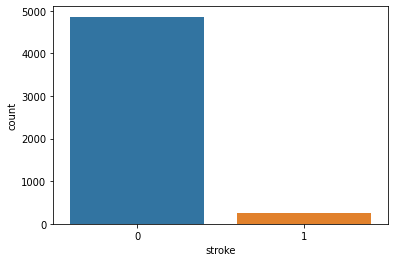

In [16]:
plt.figure()
sns.countplot(x = 'stroke', data = sp1)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd878e3f050>,
      dtype=object)

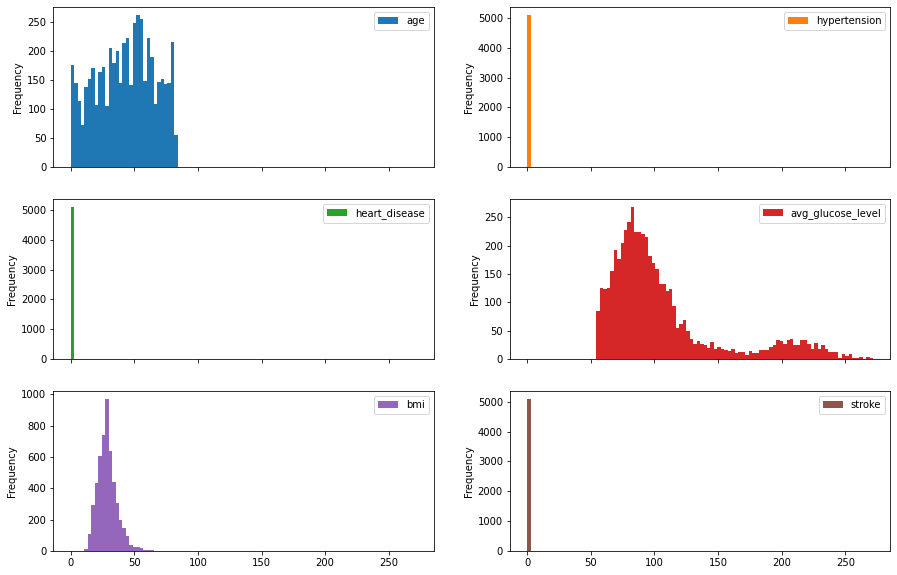

In [17]:
sp1.plot.hist(subplots=True,layout=(3,2),figsize=(15,10),bins=100)

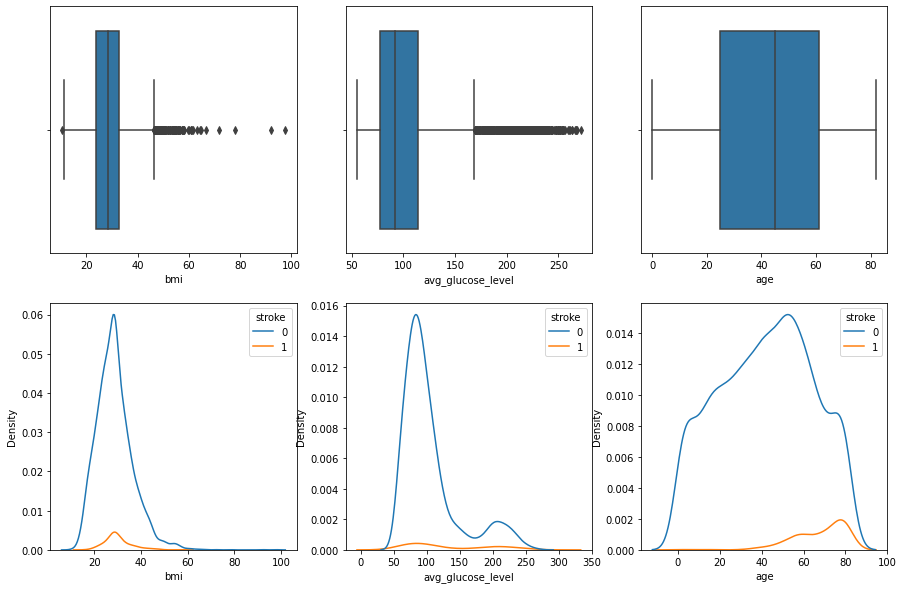

In [18]:
fig, ax = plt.subplots(2,3,figsize = (15, 10))
sns.boxplot(data=sp1, x='age', ax=ax[0,2])
sns.boxplot(data=sp1, x='avg_glucose_level', ax=ax[0,1])
sns.boxplot(data=sp1, x='bmi', ax=ax[0,0])

sns.kdeplot(x = sp1['avg_glucose_level'], hue= sp1['stroke'], ax= ax[1,1])
sns.kdeplot(x = sp1['bmi'], hue= sp1['stroke'], ax= ax[1,0])
sns.kdeplot(x = sp1['age'], hue= sp1['stroke'], ax= ax[1,2])
plt.show()

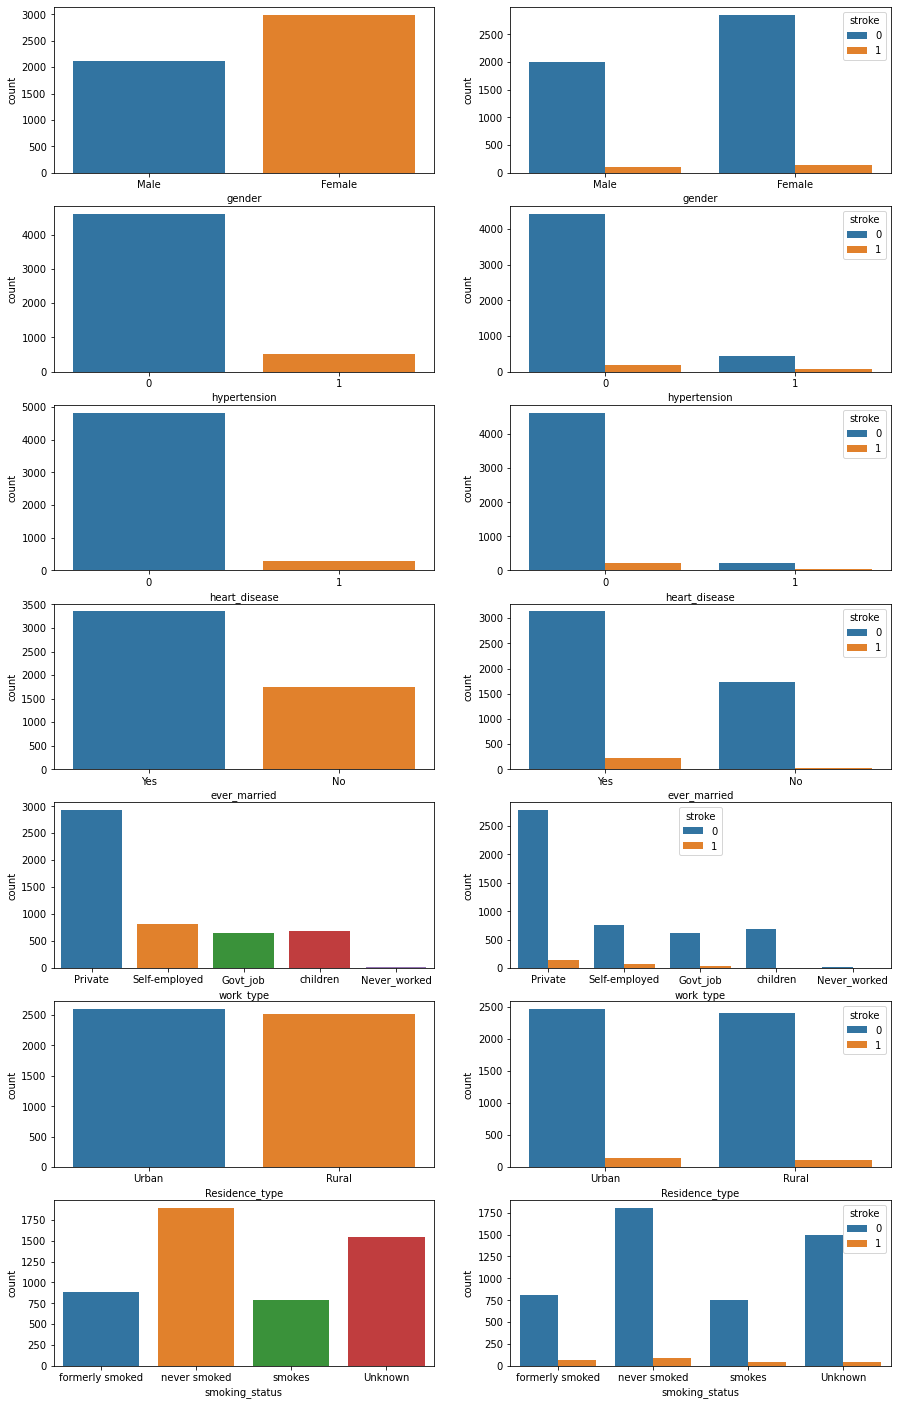

In [19]:
fig,ax = plt.subplots(7,2,figsize=(15,25))
sns.countplot(data = sp1, x = 'gender', ax=ax[0,0])
sns.countplot(data = sp1, x = 'gender',hue='stroke', ax=ax[0,1])

sns.countplot(data = sp1, x = 'hypertension', ax=ax[1,0])
sns.countplot(data = sp1, x = 'hypertension',hue='stroke', ax=ax[1,1])

sns.countplot(data = sp1, x = 'heart_disease', ax=ax[2,0])
sns.countplot(data = sp1, x = 'heart_disease',hue='stroke', ax=ax[2,1])

sns.countplot(data = sp1, x = 'ever_married', ax=ax[3,0])
sns.countplot(data = sp1, x = 'ever_married',hue='stroke', ax=ax[3,1])

sns.countplot(data = sp1, x = 'work_type', ax=ax[4,0])
sns.countplot(data = sp1, x = 'work_type',hue='stroke', ax=ax[4,1])

sns.countplot(data = sp1, x = 'Residence_type', ax=ax[5,0])
sns.countplot(data = sp1, x = 'Residence_type',hue='stroke', ax=ax[5,1])

sns.countplot(data = sp1, x = 'smoking_status', ax=ax[6,0])
sns.countplot(data = sp1, x = 'smoking_status',hue='stroke', ax=ax[6,1])

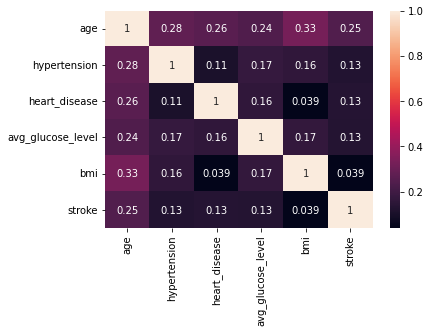

In [20]:
co = sp1.corr() 

sns.heatmap(co,annot=True)
plt.show()

In [21]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

sp1['gender_enc'] = enc.fit_transform(sp1['gender'])

# Compare the two columns
print(sp1[['gender', 'gender_enc']].head())

   gender  gender_enc
0    Male           1
1  Female           0
2    Male           1
3  Female           0
4  Female           0


In [22]:
sp1.describe(include='all')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_enc
count,5109,5109.000000,5109.000000,5109.000000,5109,5109,5109,5109.000000,5109.000000,5109,5109.000000,5109.000000
unique,2,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN,NaN
top,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN,NaN
freq,2994,NaN,NaN,NaN,3353,2924,2596,NaN,NaN,1892,NaN,NaN
mean,NaN,43.229986,0.097475,0.054022,NaN,NaN,NaN,106.140399,28.894508,NaN,0.048738,0.413975
std,NaN,22.613575,0.296633,0.226084,NaN,NaN,NaN,45.285004,7.698235,NaN,0.215340,0.492592
min,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000,0.000000
25%,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.240000,23.800000,NaN,0.000000,0.000000
50%,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.880000,28.400000,NaN,0.000000,0.000000
75%,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,32.800000,NaN,0.000000,1.000000


In [23]:
cata_col=cata_col[1::]
print(cata_col)

['ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [24]:
print(sp1.columns)

for i in cata_col:
  category_enc = pd.get_dummies(sp1[i])
  sp1[category_enc.columns]=category_enc
  sp1.drop(i,axis=1,inplace=True)

print(sp1.columns)
  

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'gender_enc'],
      dtype='object')
Index(['gender', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke', 'gender_enc', 'No', 'Yes', 'Govt_job', 'Never_worked',
       'Private', 'Self-employed', 'children', 'Rural', 'Urban', 'Unknown',
       'formerly smoked', 'never smoked', 'smokes'],
      dtype='object')


In [25]:
sp1.head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_enc,No,Yes,...,Never_worked,Private,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes
0,Male,67.0,0,1,228.69,36.600000,1,1,0,1,...,0,1,0,0,0,1,0,1,0,0
1,Female,61.0,0,0,202.21,28.893237,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
2,Male,80.0,0,1,105.92,32.500000,1,1,0,1,...,0,1,0,0,1,0,0,0,1,0
3,Female,49.0,0,0,171.23,34.400000,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,Female,79.0,1,0,174.12,24.000000,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0


In [26]:
sp1.drop(['gender'],axis=1,inplace=True)

In [27]:
X=sp1.drop(['stroke'],axis=1)
y=sp1['stroke']

print(X.columns)

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_enc', 'No', 'Yes', 'Govt_job', 'Never_worked', 'Private',
       'Self-employed', 'children', 'Rural', 'Urban', 'Unknown',
       'formerly smoked', 'never smoked', 'smokes'],
      dtype='object')


In [28]:
outliers_cols = ['avg_glucose_level','bmi']
for col in outliers_cols:
  q1 = sp1[col].quantile(.25)
  q3 = sp1[col].quantile(0.75)
  iqr= q3-q1
  up_limit = q3 + 1.5 * iqr
  low_limit = q1 - 1.5 * iqr

  sp1.loc[(sp1[col] < low_limit),col] = low_limit
  sp1.loc[(sp1[col] > up_limit),col] = up_limit

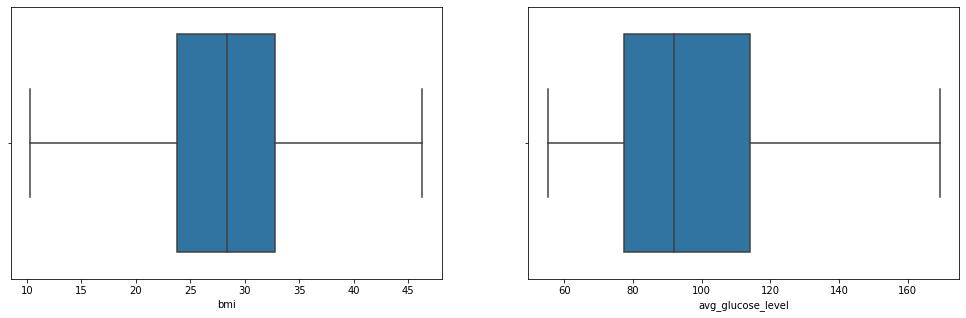

In [29]:
fig, ax = plt.subplots(1,2,figsize = (17, 5))
sns.boxplot(data=sp1, x='avg_glucose_level', ax=ax[1])
sns.boxplot(data=sp1, x='bmi', ax=ax[0])
plt.show()

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scale_features=['bmi', 'avg_glucose_level', 'age']


sp1[scale_features] = scaler.fit_transform(sp1[scale_features])

In [31]:
# Oversampling of Minority Class
from imblearn.over_sampling import RandomOverSampler
over_sample= RandomOverSampler(sampling_strategy='minority')

X_sample, y_sample = over_sample.fit_resample(X,y)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, train_size=0.7, test_size=0.3,
                                                      random_state=42)
print(X_train.shape)
print(X_test.shape)

(6804, 19)
(2916, 19)


The Training accuracy of the model is 0.66
The Testing accuracy of the model is 0.66


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


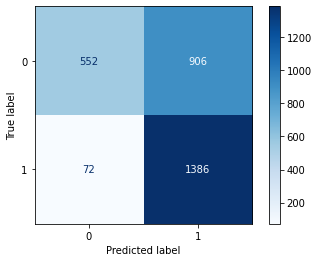

In [33]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred_gnb=gnb.predict(X_test)
plot_confusion_matrix(gnb, X_test, y_test,cmap='Blues')
print("The Training accuracy of the model is {:.2f}".format(gnb.score(X_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(gnb.score(X_test, y_test)))
plt.show()

The Training accuracy of the model is 0.78
The Testing accuracy of the model is 0.77


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


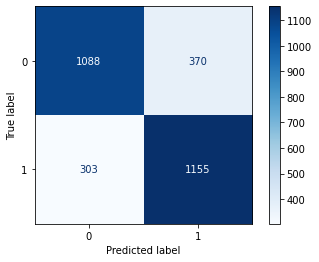

In [34]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=10000)
log.fit(X_train, y_train)
print("The Training accuracy of the model is {:.2f}".format(log.score(X_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(log.score(X_test, y_test)))

y_pred_log=log.predict(X_test)
plot_confusion_matrix(log, X_test, y_test,cmap='Blues')
plt.show()

The Training accuracy of the model is 1.00
The Testing accuracy of the model is 0.97


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


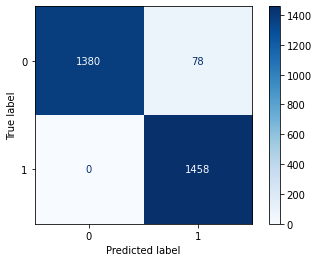

In [35]:
from sklearn.neighbors import KNeighborsClassifier


knn=KNeighborsClassifier(n_neighbors = 2)

knn.fit(X_train, y_train)

y_pred_knn=knn.predict(X_test)
print("The Training accuracy of the model is {:.2f}".format(knn.score(X_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(knn.score(X_test, y_test)))

plot_confusion_matrix(knn, X_test, y_test,cmap='Blues')  


The Training accuracy of the model is 1.00
The Testing accuracy of the model is 0.99


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


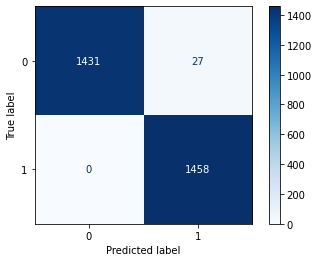

In [36]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(n_estimators= 100)
forest_model.fit(X_train, y_train)
y_pred_rf = forest_model.predict(X_test)

print("The Training accuracy of the model is {:.2f}".format(forest_model.score(X_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(forest_model.score(X_test, y_test)))
plot_confusion_matrix(forest_model, X_test, y_test,cmap='Blues')
plt.show()

The Training accuracy of the model is 0.77
The Testing accuracy of the model is 0.76


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


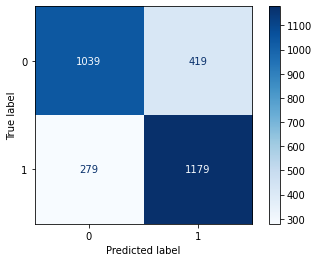

In [37]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

y_pred_svm = svc.predict(X_test)
print("The Training accuracy of the model is {:.2f}".format(svc.score(X_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(svc.score(X_test, y_test)))

plot_confusion_matrix(svc, X_test, y_test,cmap='Blues')
plt.show()

The Training accuracy of the model is 0.78
The Testing accuracy of the model is 0.79


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


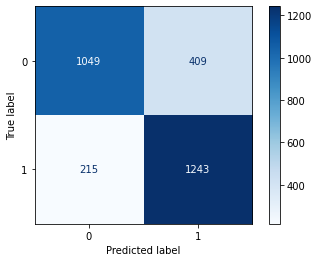

In [38]:
from sklearn.neural_network import MLPClassifier
nnc=MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000)
nnc.fit(X_train, y_train)

y_pred_nnc = nnc.predict(X_test)

print("The Training accuracy of the model is {:.2f}".format(nnc.score(X_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(nnc.score(X_test, y_test)))
plot_confusion_matrix(nnc, X_test, y_test,cmap='Blues')
plt.show()